In [1]:
import pandas as pd
import numpy as np
import os
import geopandas as gpd
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
# Load the data from the Excel file
file_path = "Resistance.xlsx"
data_resistance = pd.read_excel(file_path)
file_path = "Adaptability.xlsx"
data_adaptability = pd.read_excel(file_path)
file_path = "Recovery.xlsx"
data_recovery = pd.read_excel(file_path)

In [3]:
data_merged = pd.merge(data_resistance, data_adaptability, on=['Borough', 'Year'], how='outer')
data_merged = pd.merge(data_merged, data_recovery, on=['Borough', 'Year'], how='outer')

In [4]:
data_merged.head()

,Borough,Year,Sector,Fuel,KtCO2e,MtCO2e,GDP(pounds_million),Harmful_gases_per_unit_GDP(Tons/pounds),Household_Waste_Recycling_Rates,Consumption_of_fuels,Green_area_hectare,Green_area_m2,Population,Green_area_per_person
0,Barking and Dagenham,2017,Total,Total,561.377177,0.561377,3986,0.000141,25.3,12.975179,17.608124,1.760812e+05,210513,0.836439
1,Barnet,2017,Total,Total,1250.835756,1.250836,9904,0.000126,37.4,12.270119,1481.778293,1.481778e+07,391446,37.853964
2,Bexley,2017,Total,Total,831.690035,0.831690,6932,0.000120,52.7,19.755205,5030.909762,5.030910e+07,247179,203.533058
3,Brent,2017,Total,Total,970.354545,0.970355,9759,0.000099,36.4,27.230555,2759.068177,2.759068e+07,332750,82.917150
4,Bromley,2017,Total,Total,1021.413252,1.021413,9232,0.000111,46.9,13.808983,1726.558641,1.726559e+07,330909,52.176237


In [5]:
# Initialize a column for the normalized values
data_merged['X1_star'] = pd.Series(dtype='float')
column_to_normalize = 'Harmful_gases_per_unit_GDP(Tons/pounds)'
# Iterate over each year to perform the normalization
for year in range(2010, 2022):  # Including 2021
    # Filter the DataFrame for the current year
    year_data = data_merged[data_merged['Year'] == year]
    
    # Calculate the max and min values for the current year
    X1_max = year_data[column_to_normalize].max()
    X1_min = year_data[column_to_normalize].min()
    
    # Apply the normalization formula for the current year
    data_merged.loc[data_merged['Year'] == year, 'X1_star'] = (X1_max - year_data[column_to_normalize]) / (X1_max - X1_min)

# Check the results
print(data_merged[['Year', 'Borough', 'Harmful_gases_per_unit_GDP(Tons/pounds)', 'X1_star']].head())

   Year               Borough  Harmful_gases_per_unit_GDP(Tons/pounds)  \
0  2017  Barking and Dagenham                                 0.000141   
1  2017                Barnet                                 0.000126   
2  2017                Bexley                                 0.000120   
3  2017                 Brent                                 0.000099   
4  2017               Bromley                                 0.000111   

    X1_star  
0  0.047342  
1  0.154337  
2  0.200822  
3  0.352005  
4  0.269546  


In [6]:
data_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396 entries, 0 to 395
Data columns (total 15 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Borough                                  396 non-null    object 
 1   Year                                     396 non-null    int64  
 2   Sector                                   396 non-null    object 
 3   Fuel                                     396 non-null    object 
 4   KtCO2e                                   396 non-null    float64
 5   MtCO2e                                   396 non-null    float64
 6   GDP(pounds_million)                      396 non-null    int64  
 7   Harmful_gases_per_unit_GDP(Tons/pounds)  396 non-null    float64
 8   Household_Waste_Recycling_Rates          396 non-null    float64
 9   Consumption_of_fuels                     396 non-null    float64
 10  Green_area_hectare                       396 non-n

In [7]:
# Initialize a column for the normalized values
data_merged['X2_star'] = pd.Series(dtype='float')
column_to_normalize = 'Household_Waste_Recycling_Rates'
# Iterate over each year to perform the normalization
for year in range(2010, 2022):  # Including 2021
    # Filter the DataFrame for the current year
    year_data = data_merged[data_merged['Year'] == year]
    
    # Calculate the max and min values for the current year
    X2_max = year_data[column_to_normalize].max()
    X2_min = year_data[column_to_normalize].min()
    
    # Apply the normalization formula for the current year
    data_merged.loc[data_merged['Year'] == year, 'X2_star'] = (year_data[column_to_normalize] - X2_min) / (X2_max - X2_min)

data_merged['X3_star'] = pd.Series(dtype='float')
column_to_normalize = 'Consumption_of_fuels'
# Iterate over each year to perform the normalization
for year in range(2010, 2022):  # Including 2021
    # Filter the DataFrame for the current year
    year_data = data_merged[data_merged['Year'] == year]
    
    # Calculate the max and min values for the current year
    X3_max = year_data[column_to_normalize].max()
    X3_min = year_data[column_to_normalize].min()
    
    # Apply the normalization formula for the current year
    data_merged.loc[data_merged['Year'] == year, 'X3_star'] = (X3_max - year_data[column_to_normalize]) / (X3_max - X3_min)

data_merged['X4_star'] = pd.Series(dtype='float')
column_to_normalize = 'Green_area_per_person'
# Iterate over each year to perform the normalization
for year in range(2010, 2022):  # Including 2021
    # Filter the DataFrame for the current year
    year_data = data_merged[data_merged['Year'] == year]
    
    # Calculate the max and min values for the current year
    X4_max = year_data[column_to_normalize].max()
    X4_min = year_data[column_to_normalize].min()
    
    # Apply the normalization formula for the current year
    data_merged.loc[data_merged['Year'] == year, 'X4_star'] = (year_data[column_to_normalize] - X4_min) / (X4_max - X4_min)

In [8]:
data_merged.head()

,Borough,Year,Sector,Fuel,KtCO2e,MtCO2e,GDP(pounds_million),Harmful_gases_per_unit_GDP(Tons/pounds),Household_Waste_Recycling_Rates,Consumption_of_fuels,Green_area_hectare,Green_area_m2,Population,Green_area_per_person,X1_star,X2_star,X3_star,X4_star
0,Barking and Dagenham,2017,Total,Total,561.377177,0.561377,3986,0.000141,25.3,12.975179,17.608124,1.760812e+05,210513,0.836439,0.047342,0.290155,0.840555,0.000000
1,Barnet,2017,Total,Total,1250.835756,1.250836,9904,0.000126,37.4,12.270119,1481.778293,1.481778e+07,391446,37.853964,0.154337,0.603627,0.853977,0.029087
2,Bexley,2017,Total,Total,831.690035,0.831690,6932,0.000120,52.7,19.755205,5030.909762,5.030910e+07,247179,203.533058,0.200822,1.000000,0.711485,0.159271
3,Brent,2017,Total,Total,970.354545,0.970355,9759,0.000099,36.4,27.230555,2759.068177,2.759068e+07,332750,82.917150,0.352005,0.577720,0.569179,0.064496
4,Bromley,2017,Total,Total,1021.413252,1.021413,9232,0.000111,46.9,13.808983,1726.558641,1.726559e+07,330909,52.176237,0.269546,0.849741,0.824682,0.040341


In [9]:
columns_to_keep = ['Borough','Year','X1_star','X2_star','X3_star','X4_star']
data_process = data_merged[columns_to_keep]

In [10]:
data_process.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396 entries, 0 to 395
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Borough  396 non-null    object 
 1   Year     396 non-null    int64  
 2   X1_star  396 non-null    float64
 3   X2_star  396 non-null    float64
 4   X3_star  396 non-null    float64
 5   X4_star  396 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 18.7+ KB


In [13]:
# Create the Data_clean folder
data_folder = "Data_clean"
if not os.path.exists(data_folder):
    os.makedirs(data_folder)

# Export DataFrame to CSV file
output_file = os.path.join(data_folder, "data_01071117.csv")
data_process.to_csv(output_file, index=False)

In [14]:
#之前第二次熵权法 wj是相加，但权重有问题
# Function to calculate entropy for a given indicator data
def calculate_entropy(indicator_data):
    # Replace zero values to avoid log(0)
    indicator_data = indicator_data.replace(0, np.nan)
    
    # Calculate the proportion p_ij
    p_ij = indicator_data / indicator_data.sum()
    
    # Calculate the information entropy e_j
    K = 1 / np.log(33)
    e_j = -K * (p_ij * np.log(p_ij)).sum(skipna=True)
    
    # Replace NaN values back to 0
    p_ij = p_ij.replace(np.nan, 0)
    
    return e_j, p_ij

# Assuming 'data_process' is a DataFrame with columns 'Year' and indicators 'X1_star' to 'X4_star'
# Initialize an empty list to store DataFrames for each year
dataframes_list = []

# Calculate entropies for all indicators across all years
entropies = []
for indicator in ['X1_star', 'X2_star', 'X3_star', 'X4_star']:
    # Pass the entire column for the indicator to calculate_entropy
    entropy, _ = calculate_entropy(data_process[indicator])
    entropies.append(entropy)

# Calculate weights using the entropies from all indicators
weights = [(1 - e_j) / sum(1 - np.array(entropies)) for e_j in entropies]

# Iterate over each year and calculate weighted scores
for year in range(2010, 2021):
    # Filter the data for the current year
    year_data = data_process[data_process['Year'] == year].copy()
    
    # Calculate the weighted score for each indicator
    for i, indicator in enumerate(['X1_star', 'X2_star', 'X3_star', 'X4_star']):
        # Get the entropy and proportions directly for the current year and indicator
        _, p_ij = calculate_entropy(year_data[indicator])
        year_data[indicator + '_weighted'] = p_ij * weights[i]

    
    # Add the DataFrame for the current year to the list
    dataframes_list.append(year_data)

# Concatenate all DataFrames in the list to create the comprehensive_scores DataFrame
comprehensive_scores = pd.concat(dataframes_list, ignore_index=True)

In [11]:
#1.7熵权法

def calculate_entropy(indicator_data):
    # Replace zero values to avoid log(0) and negative infinity in entropy calculation
    indicator_data = indicator_data.replace(0, np.finfo(float).eps)  # Use a small number instead of zero
    p_ij = indicator_data / indicator_data.sum()  # Calculate the proportion p_ij
    K = 1 / np.log(33)  # Calculate the constant K
    e_j = -K * (p_ij * np.log(p_ij)).sum()  # Calculate the entropy e_j
    return e_j

# Initialize an empty list to store DataFrames for each year
dataframes_list = []

# Calculate entropies and weights for each year
for year in range(2010, 2022):
    year_data = data_process[data_process['Year'] == year].copy()
    entropies = year_data[['X1_star', 'X2_star', 'X3_star', 'X4_star']].apply(calculate_entropy, axis=0)
    weights = (1 - entropies) / (1 - entropies).sum()  # Calculate weights, ensuring they sum up to 1 within the year
    for i, indicator in enumerate(['X1_star', 'X2_star', 'X3_star', 'X4_star']):
        year_data[indicator + '_weighted'] = year_data[indicator] * weights.values[i]  # Apply weights to the indicators
    dataframes_list.append(year_data)  # Append the yearly data to the list

# Concatenate all DataFrames in the list to create the comprehensive_scores DataFrame
comprehensive_scores = pd.concat(dataframes_list, ignore_index=True)

# Now you should have the comprehensive_scores DataFrame with correctly calculated weights per year

In [12]:
comprehensive_scores.head()

,Borough,Year,X1_star,X2_star,X3_star,X4_star,X1_star_weighted,X2_star_weighted,X3_star_weighted,X4_star_weighted
0,Barking and Dagenham,2010,0.213339,0.469720,0.689311,0.000000,0.036834,0.062400,0.028896,0.000000
1,Barnet,2010,0.242355,0.479268,0.800776,0.032084,0.041844,0.063668,0.033568,0.020937
2,Bexley,2010,0.290628,1.000000,0.769884,0.169059,0.050179,0.132845,0.032273,0.110324
3,Brent,2010,0.389046,0.349847,0.485673,0.069744,0.067171,0.046475,0.020359,0.045513
4,Bromley,2010,0.389424,0.689743,0.800337,0.042824,0.067237,0.091629,0.033550,0.027946


In [63]:
# Create the Data_clean folder
data_folder = "Data_clean"
if not os.path.exists(data_folder):
    os.makedirs(data_folder)

# Export DataFrame to CSV file
output_file = os.path.join(data_folder, "comprehensive_scores_01081744.csv")
comprehensive_scores.to_csv(output_file, index=False)

In [13]:
# Calculate the combined weighted values for Resistance, Adaptability, and Recovery
comprehensive_scores['RES'] = comprehensive_scores['X1_star_weighted']
comprehensive_scores['ADA'] = comprehensive_scores['X2_star_weighted'] + comprehensive_scores['X3_star_weighted']
#comprehensive_scores['ADA'] = comprehensive_scores['X2_star_weighted'] 
comprehensive_scores['REC'] = comprehensive_scores['X4_star_weighted']

# Assuming data_merged is the DataFrame with the standardized 'RES', 'ADA', and 'REC' columns.

# Define a small positive value to add to REC to avoid zero values
small_positive_value = 1e-6

# Replace zero values in REC with the small positive value
comprehensive_scores['REC_adj'] = comprehensive_scores['REC'].replace(0, small_positive_value)
comprehensive_scores['ADA_adj'] = comprehensive_scores['ADA'].replace(0, small_positive_value)
comprehensive_scores['RES_adj'] = comprehensive_scores['RES'].replace(0, small_positive_value)

# Now, the UER values should not be zero due to REC being zero, since we have adjusted REC values slightly above zero.

# Calculate the Urban Ecological Resilience (UER) for each borough and year
comprehensive_scores['UER'] = (comprehensive_scores['RES_adj'] * comprehensive_scores['ADA_adj'] * comprehensive_scores['REC_adj']) ** (1/3)

# Check the result
comprehensive_scores[['Year', 'Borough', 'RES', 'ADA', 'REC', 'UER']].head()

,Year,Borough,RES,ADA,REC,UER
0,2010,Barking and Dagenham,0.036834,0.091295,0.000000,0.001498
1,2010,Barnet,0.041844,0.097236,0.020937,0.044001
2,2010,Bexley,0.050179,0.165118,0.110324,0.097050
3,2010,Brent,0.067171,0.066835,0.045513,0.058899
4,2010,Bromley,0.067237,0.125179,0.027946,0.061728


In [14]:
# Assuming 'data' is your DataFrame with 'Year', 'Borough', and 'UER' columns
uer_rankings = []

# Iterate through each year
for year in range(2010, 2022):
    # Filter the DataFrame for the current year
    year_data = comprehensive_scores[comprehensive_scores['Year'] == year]
    
    # Calculate the rank for UER values. The rank method assigns rank 1 to the highest value.
    year_data['Rank'] = year_data['UER'].rank(ascending=False, method='min')
    
    # Append the year, borough name, UER value, and rank to the list
    for _, row in year_data.iterrows():
        uer_rankings.append({'Year': year, 'Borough': row['Borough'], 'UER': row['UER'], 'Rank': int(row['Rank'])})

# Convert the list of dictionaries to a DataFrame
uer_rankings_df = pd.DataFrame(uer_rankings)

# Now uer_rankings_df contains the UER values and their ranks for each borough from 2010 to 2021
print(uer_rankings_df.head())

   Year               Borough       UER  Rank
0  2010  Barking and Dagenham  0.001498    32
1  2010                Barnet  0.044001    27
2  2010                Bexley  0.097050     4
3  2010                 Brent  0.058899    17
4  2010               Bromley  0.061728    14


/tmp/ipykernel_7684/1894115169.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_data['Rank'] = year_data['UER'].rank(ascending=False, method='min')
/tmp/ipykernel_7684/1894115169.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_data['Rank'] = year_data['UER'].rank(ascending=False, method='min')
/tmp/ipykernel_7684/1894115169.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

In [48]:
uer_rankings_df.to_csv('uer_rankings.csv', index=False)

In [60]:
pip install tabulate

Note: you may need to restart the kernel to use updated packages.


In [61]:
from tabulate import tabulate

# Convert the DataFrame to a LaTeX table format
table_for_paper = tabulate(uer_rankings_df.head(), headers='keys', tablefmt='latex', showindex=False)

# Print or output the LaTeX format table
print(table_for_paper)

\begin{tabular}{rlrr}
\hline
   Year & Borough              &        UER &   Rank \\
\hline
   2010 & Barking and Dagenham & 0.00149819 &     32 \\
   2010 & Barnet               & 0.0440007  &     27 \\
   2010 & Bexley               & 0.09705    &      4 \\
   2010 & Brent                & 0.058899   &     17 \\
   2010 & Bromley              & 0.0617283  &     14 \\
\hline
\end{tabular}


/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

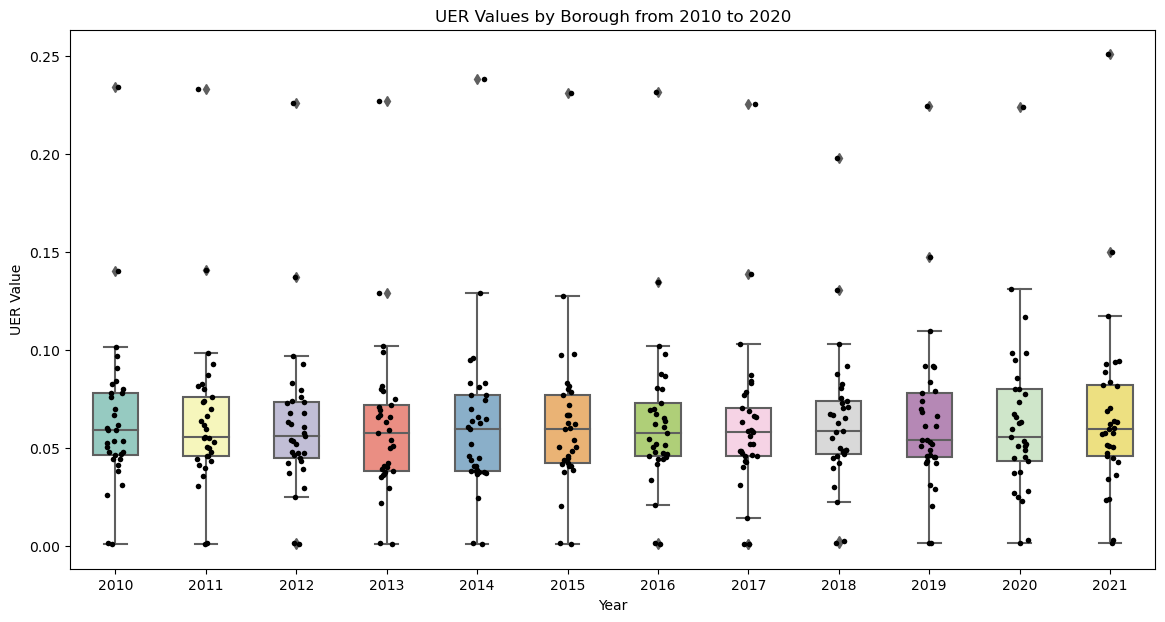

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming comprehensive_scores is a DataFrame that contains the 'Year', 'Borough', 'RES', 'ADA', 'REC', 'UER' columns

# Set up the matplotlib figure
plt.figure(figsize=(14, 7))

# Create a boxplot
sns.boxplot(x='Year', y='UER', data=comprehensive_scores, palette="Set3", width=0.5)

# Overlay with a stripplot to show the points
sns.stripplot(x='Year', y='UER', data=comprehensive_scores, color='black', size=4, jitter=True)

# Set plot title and labels
plt.title('UER Values by Borough from 2010 to 2020')
plt.xlabel('Year')
plt.ylabel('UER Value')

# Show plot
plt.show()

/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

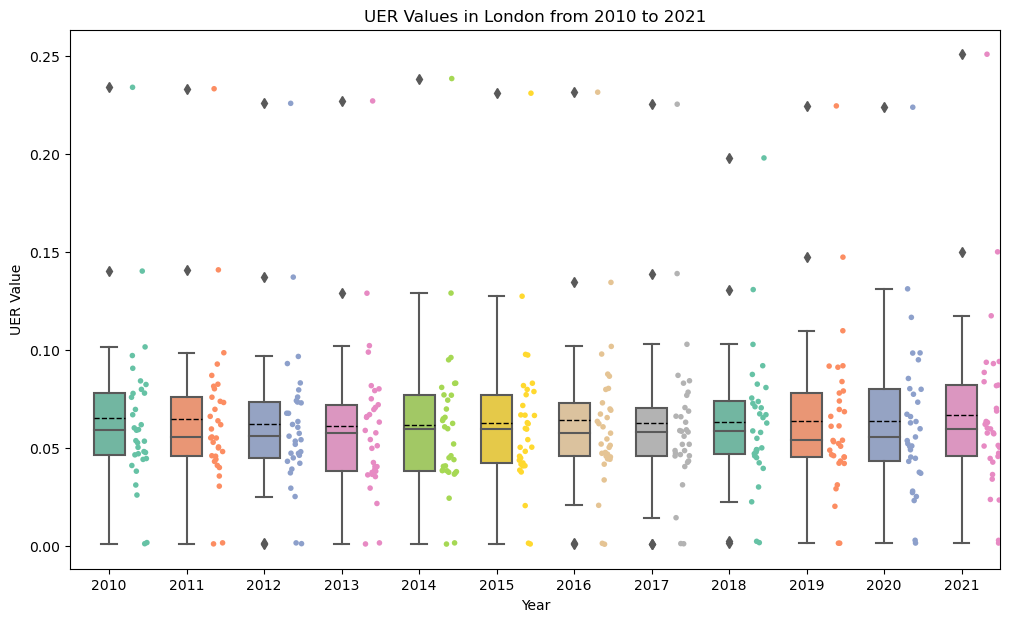

In [97]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np  # Import numpy for array operations

# Assuming comprehensive_scores is a DataFrame that contains the 'Year', 'Borough', 'RES', 'ADA', 'REC', 'UER' columns

# Set up the matplotlib figure
plt.figure(figsize=(12, 7))


# Create a boxplot
box = sns.boxplot(x='Year', y='UER', data=comprehensive_scores,palette="Set2",width=0.4, showmeans=True,
                  meanline=True, meanprops={'color': 'black', 'linewidth': 1})
# 
# Overlay with a stripplot to show the points
strip = sns.stripplot(x='Year', y='UER', data=comprehensive_scores, palette="Set2", size=4, jitter=True)

current_positions = [patch.get_x() for patch in box.artists]
for i,box_artist in enumerate(box.artists):
    # We adjust the position by subtracting 0.2 from the current x position
    box_artist.set_x(current_positions[i] - 1)
    for j in range(6*i, 6*(i+1)):
         line = box.lines[j]
         # We do the same for the related lines (whiskers, caps, fliers)
         line.set_xdata(line.get_xdata() - 5)



# Adjust the positions of the stripplot (right) by increasing the x value
for i,strip in enumerate(strip.collections):
    strip.set_offsets([(x + 0.39, y) for x, y in strip.get_offsets()])

# Set the edgecolor and linewidth for boxplot to match the fill color
for patch in box.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_edgecolor((r, g, b))
    patch.set_linewidth(3)

# Set plot title and labels
plt.title('UER Values in London from 2010 to 2021')
plt.xlabel('Year')
plt.ylabel('UER Value')

plt.savefig("uer_values_by_borough.png", dpi=300, bbox_inches='tight')
# Show plot
plt.show()


In [17]:
# Assuming comprehensive_scores is a DataFrame containing the 'Year', 'Borough', 'RES', 'ADA', 'REC', 'UER' columns

# Group the data by 'Year' and calculate statistical measures including standard deviation
stats_summary = comprehensive_scores.groupby('Year')['UER'].agg(['mean', 'median', 'max', 'min', 'std']).reset_index()

# Rename the columns for clarity
stats_summary.columns = ['Year', 'Average UER', 'Median UER', 'Maximum UER', 'Minimum UER', 'Standard Deviation UER']

# Display the statistical summary
print(stats_summary)

    Year  Average UER  Median UER  Maximum UER  Minimum UER  \
0   2010     0.064906    0.058899     0.234110     0.000930   
1   2011     0.064638    0.055480     0.233373     0.000840   
2   2012     0.062280    0.055870     0.225917     0.000957   
3   2013     0.061068    0.057575     0.227142     0.000802   
4   2014     0.061730    0.059685     0.238570     0.000749   
5   2015     0.062709    0.059460     0.231095     0.000790   
6   2016     0.064043    0.057412     0.231614     0.000664   
7   2017     0.062400    0.057999     0.225472     0.000898   
8   2018     0.063307    0.058547     0.198019     0.001480   
9   2019     0.063664    0.053672     0.224601     0.001190   
10  2020     0.063732    0.055473     0.223933     0.001268   
11  2021     0.066863    0.059578     0.251008     0.001278   

    Standard Deviation UER  
0                 0.040944  
1                 0.040263  
2                 0.039253  
3                 0.040204  
4                 0.041356  
5     

In [18]:
gdf_neighborhoods = gpd.read_file('ESRI/London_Borough_Excluding_MHW.shp')

                   NAME   GSS_CODE   HECTARES  NONLD_AREA ONS_INNER  SUB_2009  \
0  Kingston upon Thames  E09000021   3726.117       0.000         F       NaN   
1               Croydon  E09000008   8649.441       0.000         F       NaN   
2               Bromley  E09000006  15013.487       0.000         F       NaN   
3              Hounslow  E09000018   5658.541      60.755         F       NaN   
4                Ealing  E09000009   5554.428       0.000         F       NaN   

   SUB_2006                                           geometry  
0       NaN  POLYGON ((516401.600 160201.800, 516407.300 16...  
1       NaN  POLYGON ((535009.200 159504.700, 535005.500 15...  
2       NaN  POLYGON ((540373.600 157530.400, 540361.200 15...  
3       NaN  POLYGON ((521975.800 178100.000, 521967.700 17...  
4       NaN  POLYGON ((510253.500 182881.600, 510249.900 18...  


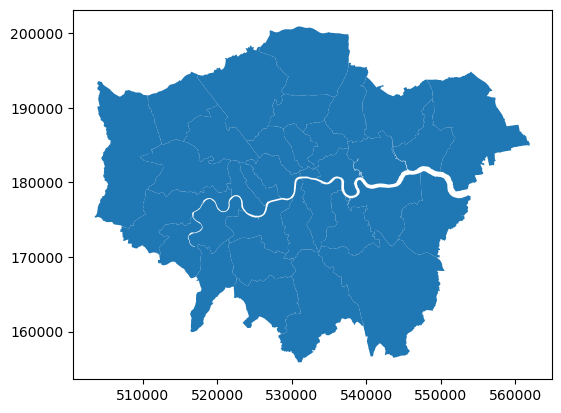

In [19]:
gdf_neighborhoods.plot()
print(gdf_neighborhoods.head())

In [20]:
gdf_neighborhoods['NAME'] = gdf_neighborhoods['NAME'].replace({
    'Kingston upon Thames': 'Kingston',
    'Richmond upon Thames': 'Richmond'
})

In [21]:
gdf_neighborhoods.head()

,NAME,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER,SUB_2009,SUB_2006,geometry
0,Kingston,E09000021,3726.117,0.000,F,NaN,NaN,"POLYGON ((516401.600 160201.800, 516407.300 16..."
1,Croydon,E09000008,8649.441,0.000,F,NaN,NaN,"POLYGON ((535009.200 159504.700, 535005.500 15..."
2,Bromley,E09000006,15013.487,0.000,F,NaN,NaN,"POLYGON ((540373.600 157530.400, 540361.200 15..."
3,Hounslow,E09000018,5658.541,60.755,F,NaN,NaN,"POLYGON ((521975.800 178100.000, 521967.700 17..."
4,Ealing,E09000009,5554.428,0.000,F,NaN,NaN,"POLYGON ((510253.500 182881.600, 510249.900 18..."


In [22]:
gdf_merged = gdf_neighborhoods.merge(comprehensive_scores, left_on='NAME', right_on='Borough')

In [23]:
gdf_merged.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 396 entries, 0 to 395
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   NAME              396 non-null    object  
 1   GSS_CODE          396 non-null    object  
 2   HECTARES          396 non-null    float64 
 3   NONLD_AREA        396 non-null    float64 
 4   ONS_INNER         396 non-null    object  
 5   SUB_2009          0 non-null      float64 
 6   SUB_2006          0 non-null      float64 
 7   geometry          396 non-null    geometry
 8   Borough           396 non-null    object  
 9   Year              396 non-null    int64   
 10  X1_star           396 non-null    float64 
 11  X2_star           396 non-null    float64 
 12  X3_star           396 non-null    float64 
 13  X4_star           396 non-null    float64 
 14  X1_star_weighted  396 non-null    float64 
 15  X2_star_weighted  396 non-null    float64 
 16  X3_star_weighted  

/tmp/ipykernel_21381/1218247185.py:43: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


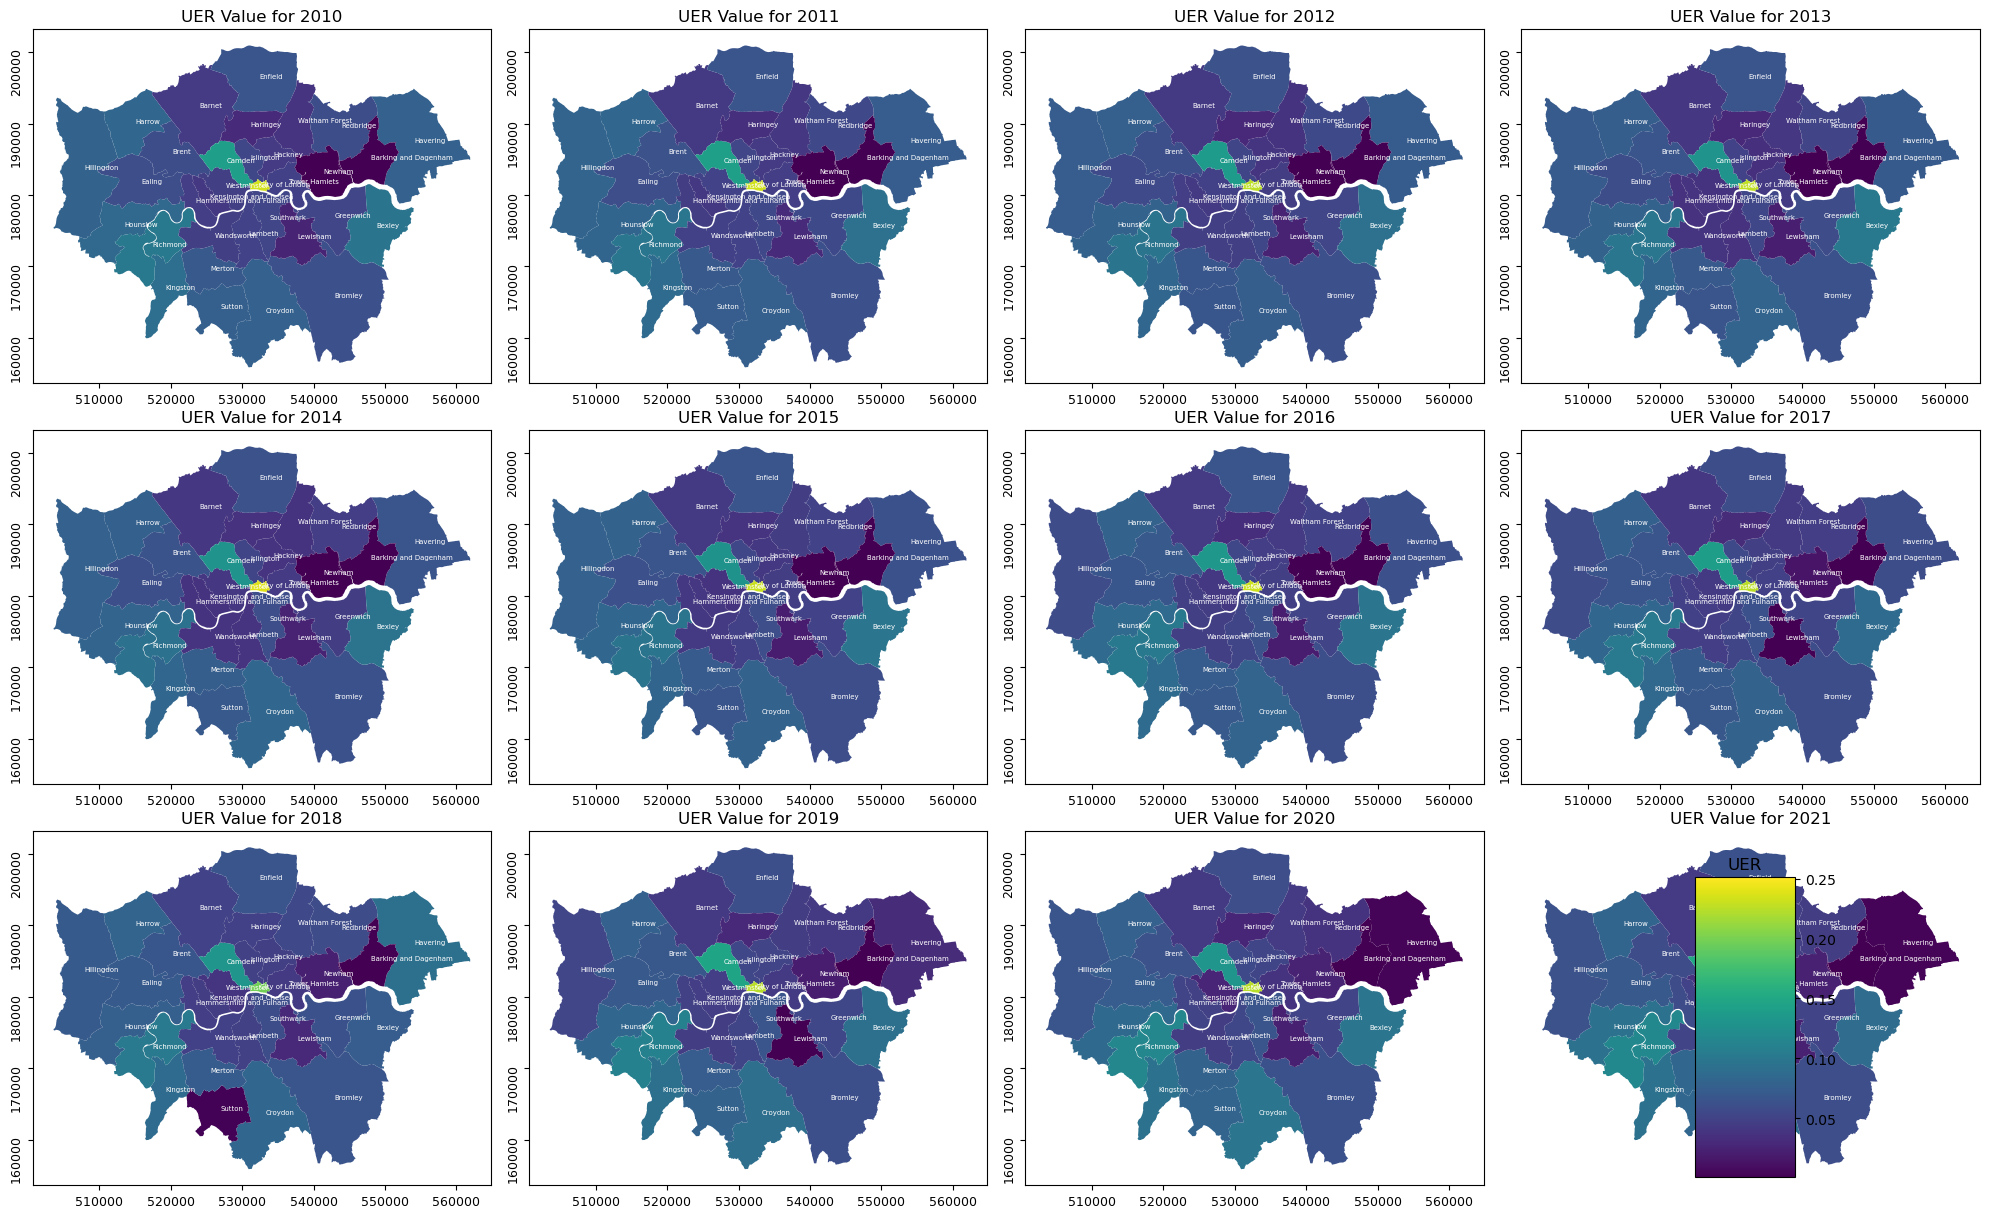

In [147]:
# Determine the global min and max UER values for the color scale
vmin = comprehensive_scores['UER'].min()
vmax = comprehensive_scores['UER'].max()

# Create the figure and axes for the subplots
fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(20, 15), squeeze=False)

# Plot each year's map in a subplot
for i, year in enumerate(range(2010, 2022)):
    # Select the current year's data
    year_data = comprehensive_scores[comprehensive_scores['Year'] == year]

    # Merge the GeoDataFrame with the year's UER data
    gdf_year_merged = gdf_neighborhoods.merge(year_data, left_on='NAME', right_on='Borough')

    # Select the current axis
    ax = axs[i // 4, i % 4]

    # Plot the map on the current axis with the standardized color scale
    gdf_year_merged.plot(column='UER', ax=ax, vmin=vmin, vmax=vmax, legend=False)
    
    for x, y, label in zip(gdf_year_merged.geometry.centroid.x, gdf_year_merged.geometry.centroid.y, gdf_year_merged['NAME']):
        ax.text(x, y, label, fontsize=5, color='white')  # Change fontsize as needed

    # Set the title for the subplot
    ax.set_title("UER Value for " + str(year))

    # Remove axis clutter
    ax.axis('on')
    plt.setp(ax.get_yticklabels(), rotation=90, fontsize=9)
    plt.setp(ax.get_xticklabels(), fontsize=9)
# Remove the empty subplot (bottom right)
axs[2][3].axis('off')

# Create a single legend for the whole figure in the space of the removed subplot
cax = fig.add_axes([0.85, 0.12, 0.05, 0.2])  # Modify to adjust the position of the colorbar
sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
fig.colorbar(sm, cax=cax, orientation='vertical')
cax.set_title('UER')

# Adjust the layout
plt.tight_layout()
plt.subplots_adjust(hspace=-0.4)
# Show the plot
plt.show()

/tmp/ipykernel_21381/2752714904.py:47: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


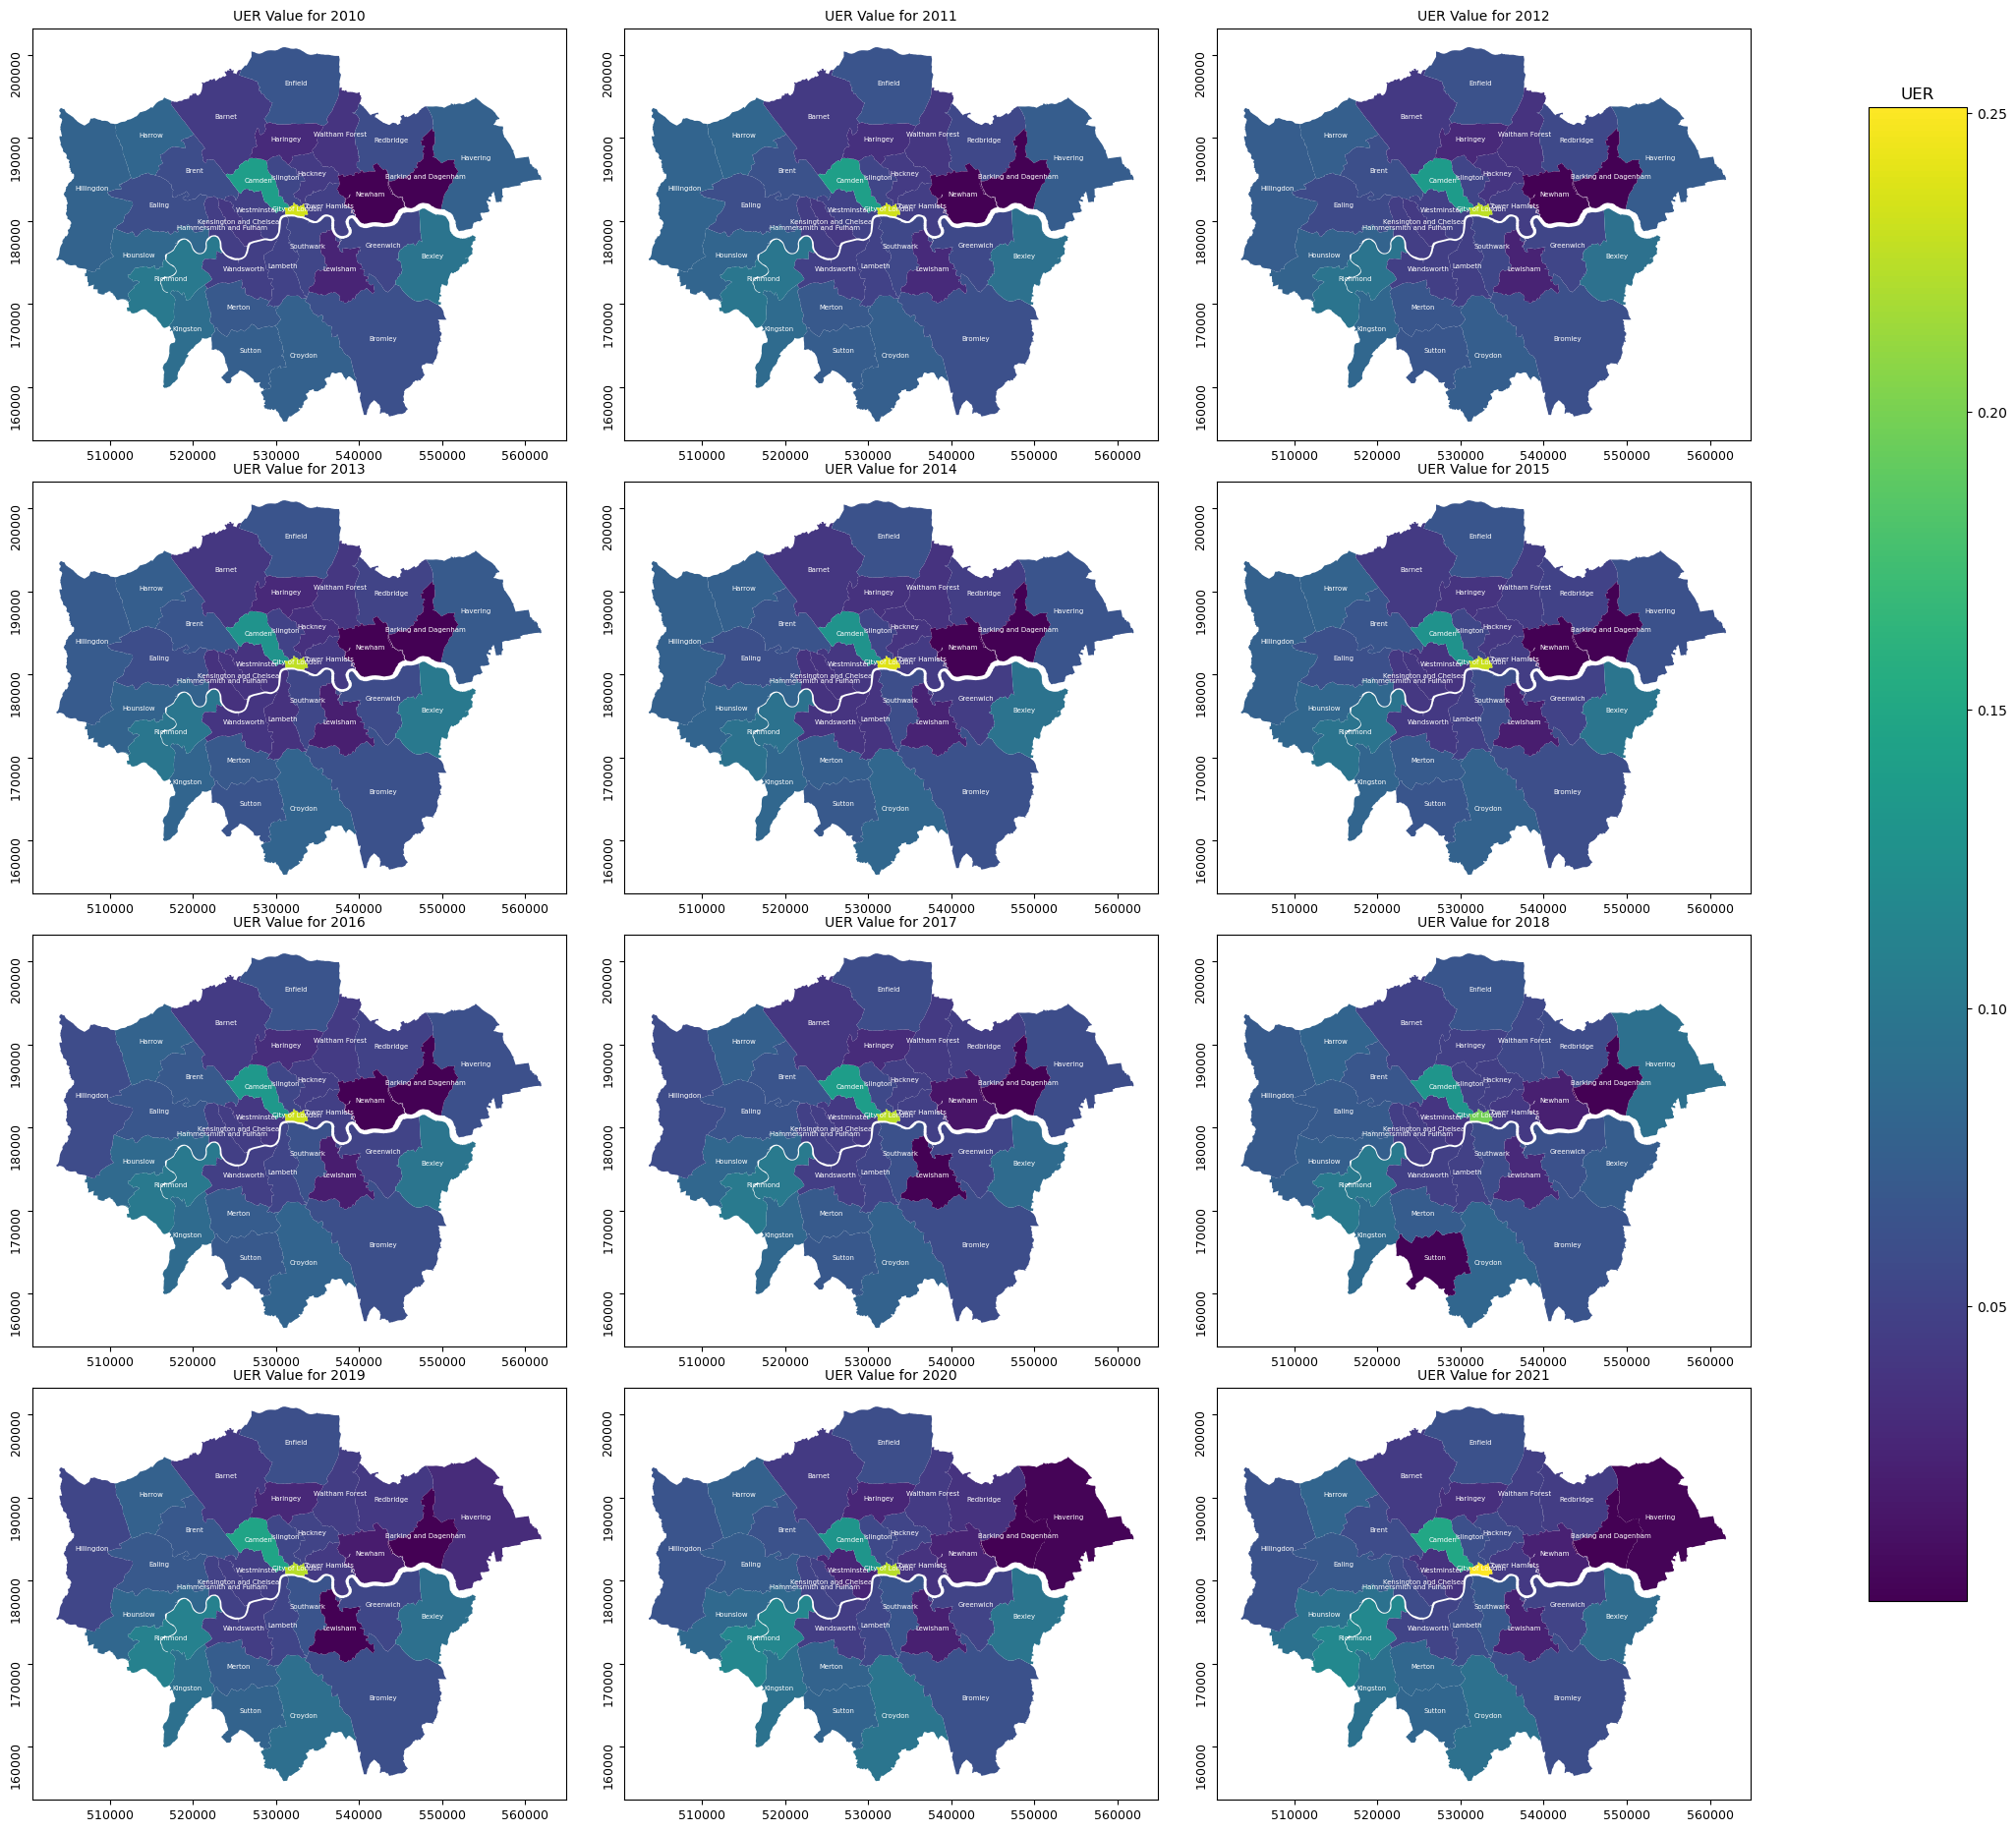

In [252]:
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

# ...（其余代码）...

# Create the figure and axes for the subplots with 4 rows and 3 columns
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(20, 20), squeeze=False)

# Plot each year's map in a subplot
for i, year in enumerate(range(2010, 2022)):
    # Select the current year's data
    year_data = comprehensive_scores[comprehensive_scores['Year'] == year]

    # Merge the GeoDataFrame with the year's UER data
    gdf_year_merged = gdf_neighborhoods.merge(year_data, left_on='NAME', right_on='Borough')

    # Select the current axis
    ax = axs[i // 3, i % 3]  # Update index for 4 rows and 3 columns

    # Plot the map on the current axis with the standardized color scale
    gdf_year_merged.plot(column='UER', ax=ax, vmin=vmin, vmax=vmax, legend=False)
    
    # Add text labels for NAME
    for x, y, label in zip(gdf_year_merged.geometry.centroid.x, gdf_year_merged.geometry.centroid.y, gdf_year_merged['NAME']):
        ax.text(x, y, label, fontsize=5, color='white', ha='center')  # Change fontsize as needed

    # Set the title for the subplot
    ax.set_title("UER Value for " + str(year), fontsize=10)

    # Remove axis clutter
    ax.axis('on')
    plt.setp(ax.get_yticklabels(), rotation=90, fontsize=9)
    plt.setp(ax.get_xticklabels(), fontsize=9)
# Remove the empty subplots if there are any
for j in range(i+1, 12):
    axs[j // 3, j % 3].axis('off')

# Create a single legend for the whole figure in the space of the removed subplot
cax = fig.add_axes([1.00, 0.12, 0.05, 0.76])  # Adjust the position and size of the colorbar
sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
fig.colorbar(sm, cax=cax, orientation='vertical')
cax.set_title('UER')

# Adjust the layout
plt.tight_layout()
plt.subplots_adjust(top=0.92, hspace=0.1, wspace=-0.2)  # Adjust spacing as needed

# Show the plot
plt.show()


/tmp/ipykernel_7684/616688454.py:54: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


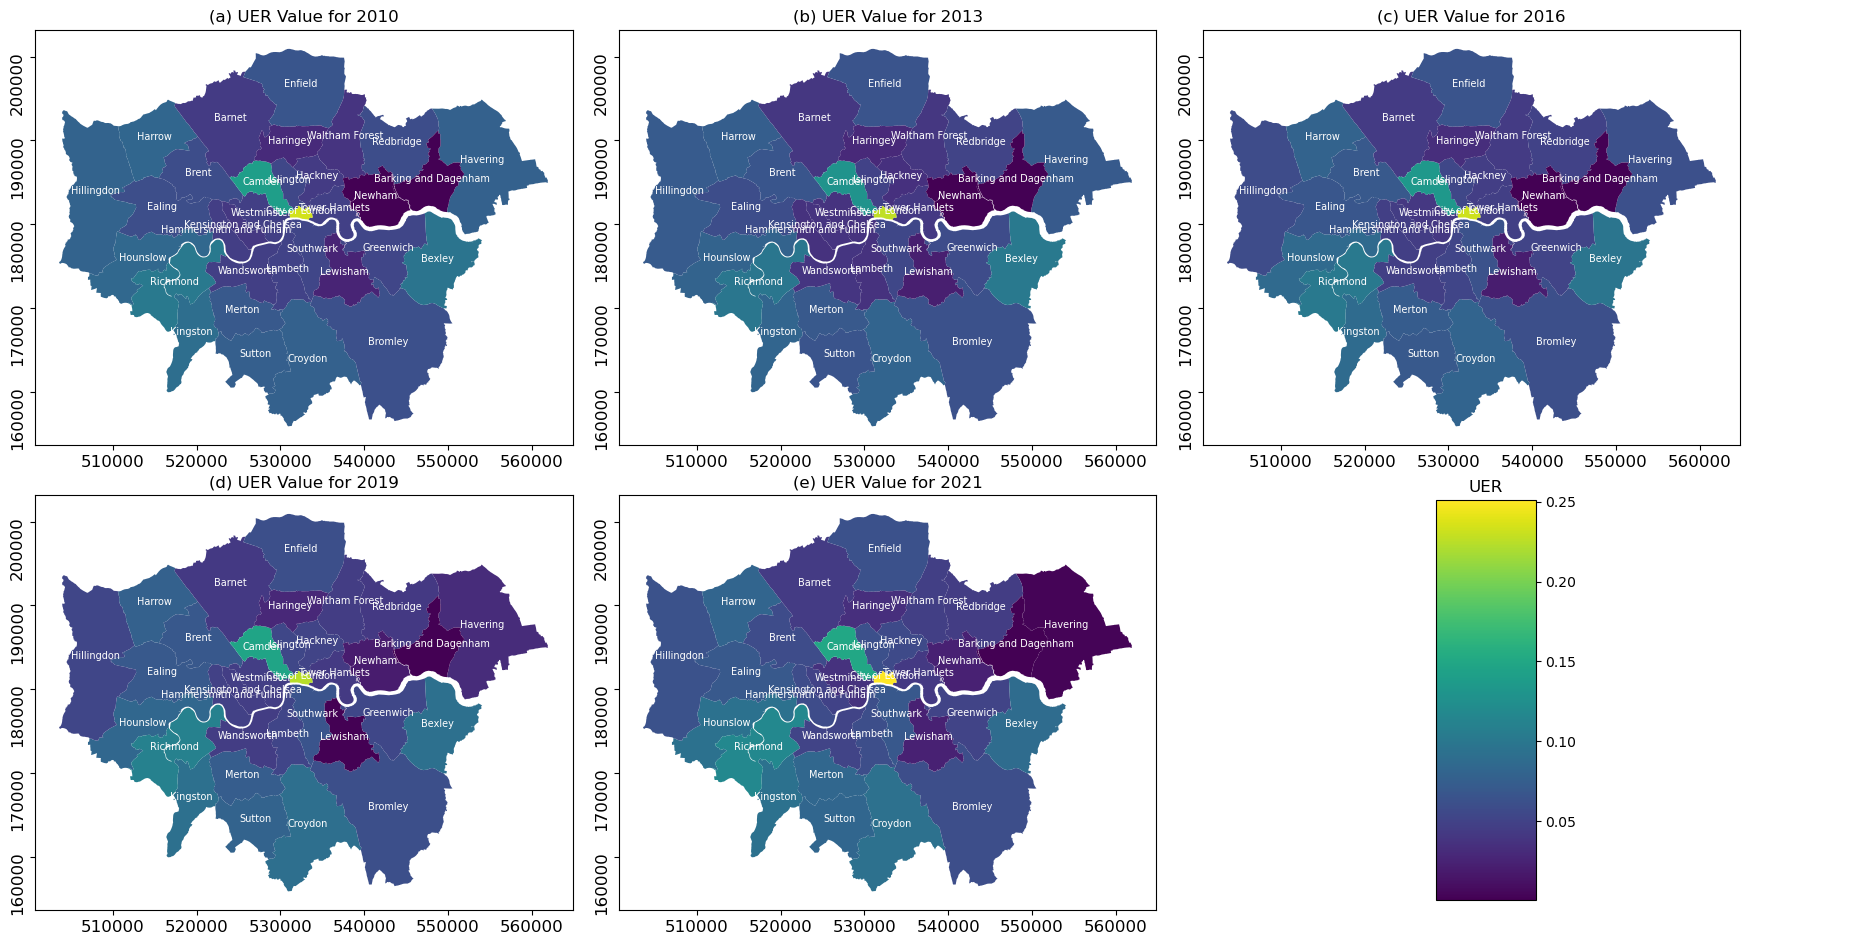

In [35]:
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

vmin = comprehensive_scores['UER'].min()
vmax = comprehensive_scores['UER'].max()
# Define the years you want to plot
years_to_plot = [2010, 2013, 2016, 2019, 2021]

# Create the figure and axes for the subplots with 2 rows and 3 columns
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20, 10), squeeze=False)  # Adjust figsize as needed

subplot_letters = ['(a)', '(b)', '(c)', '(d)', '(e)']
# Plot each selected year's map in a subplot
for i, year in enumerate(years_to_plot):
    # Select the current year's data
    year_data = comprehensive_scores[comprehensive_scores['Year'] == year]

    # Merge the GeoDataFrame with the year's UER data
    gdf_year_merged = gdf_neighborhoods.merge(year_data, left_on='NAME', right_on='Borough')

    # Calculate the row and column index for the current subplot
    row_idx = i // 3
    col_idx = i % 3

    # Select the current axis
    ax = axs[row_idx, col_idx]

    # Plot the map on the current axis with the standardized color scale
    gdf_year_merged.plot(column='UER', ax=ax, vmin=vmin, vmax=vmax, legend=False)
    
    # Add text labels for NAME
    for x, y, label in zip(gdf_year_merged.geometry.centroid.x, gdf_year_merged.geometry.centroid.y, gdf_year_merged['NAME']):
        ax.text(x, y, label, fontsize=7, color='white', ha='center')  # Change fontsize as needed

    # Set the title for the subplot
    ax.set_title(f"{subplot_letters[i]} UER Value for {year}", fontsize=12)

    # Remove axis clutter
    ax.axis('on')
    plt.setp(ax.get_yticklabels(), rotation=90, fontsize=12)
    plt.setp(ax.get_xticklabels(), fontsize=12)
# Remove the empty subplot (bottom right)
axs[1, 2].axis('off')

# Create a single legend for the whole figure in the space of the removed subplot
cax = fig.add_axes([0.78, 0.05, 0.05, 0.4])  # Adjust the position and size of the colorbar
sm = ScalarMappable(cmap='viridis', norm=Normalize(vmin=vmin, vmax=vmax))
sm._A = []
fig.colorbar(sm, cax=cax, orientation='vertical')
cax.set_title('UER')

# Adjust the layout
plt.tight_layout()
plt.subplots_adjust(top=0.92, hspace=0.12, wspace=-0.25)  # Adjust spacing as needed

# Show the plot
plt.show()


In [36]:
fig.savefig("uer_map.png", dpi=300, bbox_inches='tight')

In [180]:
pip install jenkspy

  Obtaining dependency information for jenkspy from https://files.pythonhosted.org/packages/7b/61/3e28c1451336ff72d037b627238530243361e13f4146b79ace5fcb8d5fff/jenkspy-0.4.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 650.6/650.6 kB 21.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [37]:
import statsmodels.api as sm

In [38]:
#10年一起回归
# Assuming comprehensive_scores is already loaded and contains the 'UER', 'RES', 'ADA', and 'REC' columns

# Initialize the Linear Regression model
model = LinearRegression()

# Prepare the independent variables (RES, ADA, REC) and the dependent variable (UER)
X = comprehensive_scores[['RES', 'ADA', 'REC']]
y = comprehensive_scores['UER']

# Fit the model to the data
model.fit(X, y)

# Get the coefficients (β1, β2, β3) from the model
coefficients = model.coef_
intercept = model.intercept_

# Display the coefficients
print("Coefficients (β1, β2, β3):", coefficients)
print("Intercept (β0):", intercept)

# For a more detailed summary using statsmodels
X_with_constant = sm.add_constant(X)  # Adding a constant (β0)
ols_model = sm.OLS(y, X_with_constant).fit()

# Display the statsmodels summary
print(ols_model.summary())

Coefficients (β1, β2, β3): [0.24264184 0.33823841 0.26098022]
Intercept (β0): -0.005424180839389961
                            OLS Regression Results                            
Dep. Variable:                    UER   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     1240.
Date:                Tue, 16 Jan 2024   Prob (F-statistic):          1.23e-199
Time:                        00:32:53   Log-Likelihood:                 1180.2
No. Observations:                 396   AIC:                            -2352.
Df Residuals:                     392   BIC:                            -2336.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [39]:
#逐年回归
# Assuming comprehensive_scores is already loaded and contains the 'UER', 'RES', 'ADA', 'REC', and 'Year' columns

# Initialize a dictionary to store the regression results for each year
regression_results = {}

# Loop through each year and perform the regression
for year in range(2010, 2022):
    # Filter the DataFrame for the current year
    year_data = comprehensive_scores[comprehensive_scores['Year'] == year]
    
    # Prepare the independent variables (RES, ADA, REC) and the dependent variable (UER)
    X = year_data[['RES', 'ADA', 'REC']]
    y = year_data['UER']
    
    # Fit the model to the data
    model = LinearRegression().fit(X, y)
    
    # Get the coefficients (β1, β2, β3) and intercept (β0) from the model
    coefficients = model.coef_
    intercept = model.intercept_
    
    # Store the coefficients and intercept in the results dictionary
    regression_results[year] = {
        'Coefficients': coefficients,
        'Intercept': intercept
    }
    
    # Print the coefficients for the current year
    print(f"Year: {year}")
    print(f"Coefficients (β1, β2, β3): {coefficients}")
    print(f"Intercept (β0): {intercept}")

    # For a more detailed summary using statsmodels
    X_with_constant = sm.add_constant(X)  # Adding a constant (β0)
    ols_model = sm.OLS(y, X_with_constant).fit()
    
    # Print the statsmodels summary for the current year
    print(ols_model.summary())
    print("\n" + "="*80 + "\n")

# The regression_results dictionary now contains the coefficients and intercept for each year

Year: 2010
Coefficients (β1, β2, β3): [0.24494629 0.41563175 0.25618429]
Intercept (β0): -0.009633952567095011
                            OLS Regression Results                            
Dep. Variable:                    UER   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     153.2
Date:                Tue, 16 Jan 2024   Prob (F-statistic):           7.04e-18
Time:                        00:32:58   Log-Likelihood:                 105.73
No. Observations:                  33   AIC:                            -203.5
Df Residuals:                      29   BIC:                            -197.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------

In [40]:
import matplotlib.pyplot as plt

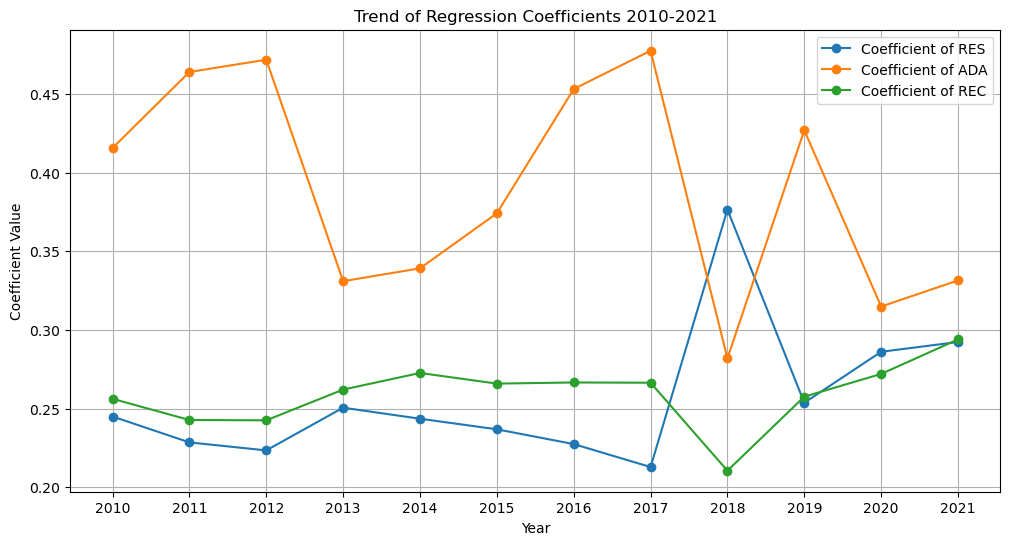

In [48]:
# Extract coefficients for each year and prepare data for plotting
years = list(range(2010, 2022))
coefficients_RES = [regression_results[year]['Coefficients'][0] for year in years]
coefficients_ADA = [regression_results[year]['Coefficients'][1] for year in years]
coefficients_REC = [regression_results[year]['Coefficients'][2] for year in years]

# Plotting the trend of coefficients over the years
plt.figure(figsize=(12, 6))

plt.plot(years, coefficients_RES, marker='o', label='Coefficient of RES')
plt.plot(years, coefficients_ADA, marker='o', label='Coefficient of ADA')
plt.plot(years, coefficients_REC, marker='o', label='Coefficient of REC')

plt.title('Trend of Regression Coefficients 2010-2021')
plt.xlabel('Year')
plt.ylabel('Coefficient Value')
plt.legend()
plt.grid(True)
plt.xticks(years)  # Ensure only the years in the dataset are used as x-ticks
plt.savefig("coefficients_trend.png", dpi=300, bbox_inches='tight')
plt.show()


In [47]:
plt.savefig("coefficients_trend.png", dpi=300, bbox_inches='tight')

<Figure size 640x480 with 0 Axes>

/opt/conda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/conda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/conda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/conda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

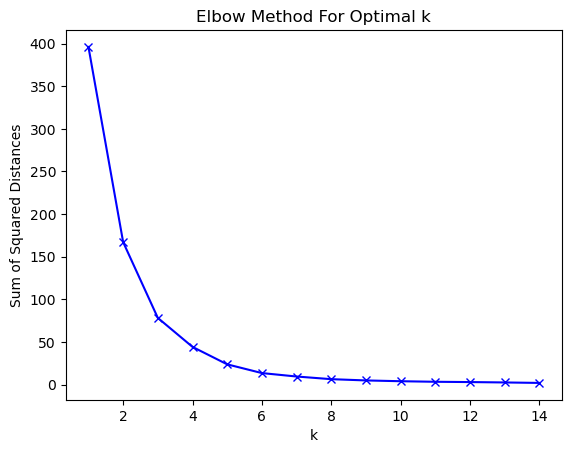

In [49]:
# Assuming 'gdf_merged' is your GeoDataFrame and it has a 'UER' column

# Extract the UER values and scale them
X = gdf_merged[['UER']].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Calculate sum of squared distances for different values of k
sum_of_squared_distances = []
K_range = range(1, 15)  # Example range, you can adjust this range
for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    km = km.fit(X_scaled)
    sum_of_squared_distances.append(km.inertia_)

# Plot the Elbow graph
plt.plot(K_range, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [50]:
# Assuming gdf_merged is your GeoDataFrame and it has a column named 'UER'

# Step 1: Extract the UER values
X = gdf_merged[['UER']].values

# Step 2: Scale the data (optional but recommended)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Apply K-means clustering
# Choose the number of clusters (k) based on your analysis (e.g., using the Elbow method)
k = 3  # Example for 3 clusters
kmeans = KMeans(n_clusters=k, random_state=42)
gdf_merged['Cluster'] = kmeans.fit_predict(X_scaled)

# Step 4: Analyze the clusters
# Print out the boroughs in each cluster and their average UER values
for cluster in range(k):
    cluster_boroughs = gdf_merged[gdf_merged['Cluster'] == cluster]
    print(f"Cluster {cluster}:")
    print(cluster_boroughs['NAME'])
    print(f"Average UER: {cluster_boroughs['UER'].mean()}")
    print("\n")

# Optionally, you can add the cluster labels back to the original GeoDataFrame for visualization
gdf_merged['Cluster'] = gdf_merged['Cluster'].astype(str)  # Convert cluster labels to strings for visualization


Cluster 0:
29                  Bromley
30                  Bromley
31                  Bromley
33                  Bromley
35                  Bromley
               ...         
379    Barking and Dagenham
380    Barking and Dagenham
381    Barking and Dagenham
382    Barking and Dagenham
383    Barking and Dagenham
Name: NAME, Length: 221, dtype: object
Average UER: 0.04047610129141569


Cluster 1:
384    City of London
385    City of London
386    City of London
387    City of London
388    City of London
389    City of London
390    City of London
391    City of London
392    City of London
393    City of London
394    City of London
395    City of London
Name: NAME, dtype: object
Average UER: 0.2287379796974165


Cluster 2:
0       Kingston
1       Kingston
2       Kingston
3       Kingston
4       Kingston
         ...    
308       Camden
309       Camden
310       Camden
311       Camden
335    Islington
Name: NAME, Length: 163, dtype: object
Average UER: 0.08241798042333946




/opt/conda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


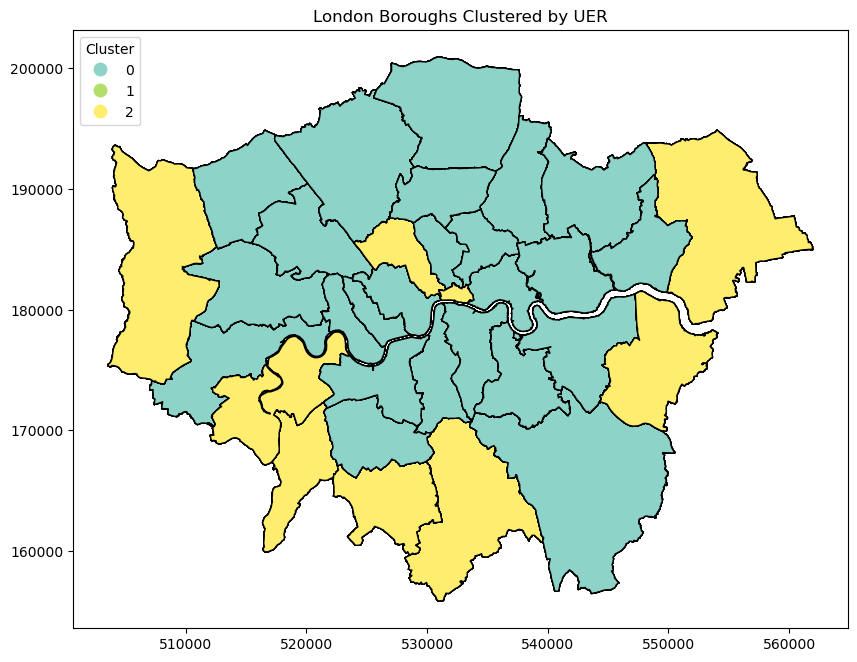

In [48]:
# Plot the boroughs, colored by their cluster assignment
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
gdf_merged.plot(column='Cluster', ax=ax, edgecolor='black', legend=True, categorical=True, 
                cmap='Set3',  # This is a qualitative colormap. You can change it as per your preference.
                legend_kwds={'title': 'Cluster', 'loc': 'upper left'})

# Optionally, set additional plot parameters
ax.set_title('London Boroughs Clustered by UER')

plt.show()

/opt/conda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Cluster 0:
60                 Havering
61                 Havering
62                 Havering
63                 Havering
64                 Havering
               ...         
379    Barking and Dagenham
380    Barking and Dagenham
381    Barking and Dagenham
382    Barking and Dagenham
383    Barking and Dagenham
Name: NAME, Length: 204, dtype: object
Average UER: 0.03985174425220681


Cluster 1:
384    City of London
385    City of London
386    City of London
387    City of London
388    City of London
389    City of London
390    City of London
391    City of London
392    City of London
393    City of London
394    City of London
395    City of London
Name: NAME, dtype: object
Average UER: 0.2287379796974164


Cluster 2:
0      Kingston
1      Kingston
2      Kingston
3      Kingston
4      Kingston
         ...   
307      Camden
308      Camden
309      Camden
310      Camden
311      Camden
Name: NAME, Length: 180, dtype: object
Average UER: 0.07916440759420561




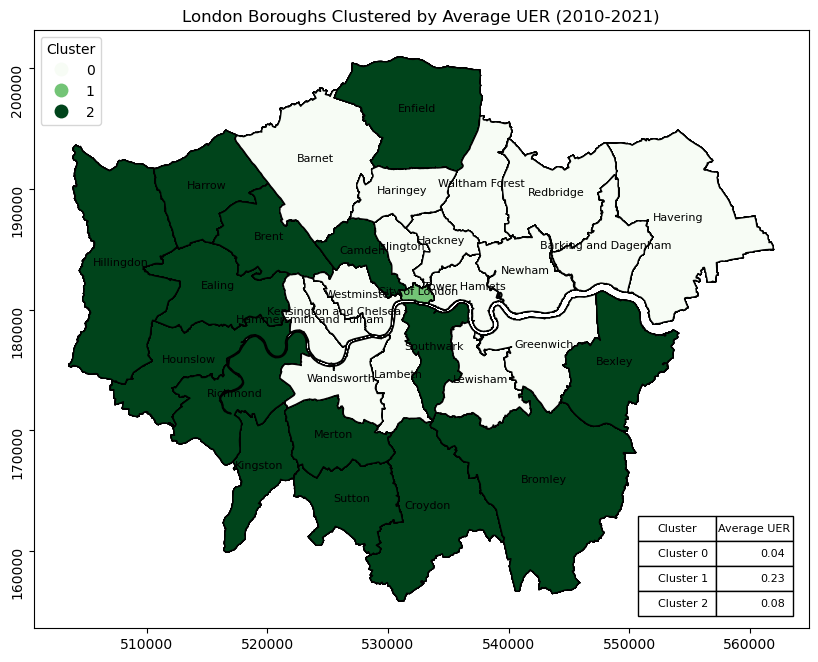

In [95]:
#2010-2021平均值
# Step 1: Calculate the average UER value for each borough over the years 2010-2020
average_UER = gdf_merged.groupby('Borough')['UER'].mean().reset_index()

# Step 2: Merge the average UER values back to the GeoDataFrame
gdf_merged = gdf_merged.drop('UER', axis=1).merge(average_UER, on='Borough', how='left')

# Step 3: Standardize the average UER values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(gdf_merged[['UER']])

# Step 4: Perform k-means clustering on the scaled average UER values
k = 3  # Example for 3 clusters
kmeans = KMeans(n_clusters=k, random_state=42)
gdf_merged['Cluster'] = kmeans.fit_predict(X_scaled)

# Step 4: Analyze the clusters
# Print out the boroughs in each cluster and their average UER values
for cluster in range(k):
    cluster_boroughs = gdf_merged[gdf_merged['Cluster'] == cluster]
    print(f"Cluster {cluster}:")
    print(cluster_boroughs['NAME'])
    print(f"Average UER: {cluster_boroughs['UER'].mean()}")
    print("\n")

# Step 5: Visualize the clustering results
fig, ax = plt.subplots(1, figsize=(10, 10))


ax.set_title('London Boroughs Clustered by Average UER (2010-2021)')
gdf_merged.plot(column='Cluster', ax=ax, edgecolor='black', legend=True, categorical=True,
                cmap='Greens', alpha=1, # This is a qualitative colormap. You can change it as per your preference.
                legend_kwds={'title': 'Cluster', 'loc': 'upper left'})
for x, y, label in zip(gdf_year_merged.geometry.centroid.x, gdf_year_merged.geometry.centroid.y, gdf_year_merged['NAME']):
    # 添加一个小的偏移量到x坐标
    offset = 0.02  # 你可以根据需要调整这个值
    ax.text(x, y, label, fontsize=8, color='black', ha='center')  # Change fontsize as needed

# 计算每个聚类的平均UER值
average_UER_per_cluster = gdf_merged.groupby('Cluster')['UER'].mean()


# 创建表格数据
cell_text = [[f"Cluster {i}", f"{average_UER_per_cluster[i]:.2f}"] for i in range(k)]
column_labels = ["Cluster", "Average UER"]

# 在图表右下角添加表格
table = ax.table(cellText=cell_text, colLabels=column_labels, loc='lower right')

# 调整表格样式
table.auto_set_font_size(False)
table.set_fontsize(8)
table.scale(0.2, 1.5)



ax.set_title('London Boroughs Clustered by Average UER (2010-2021)')

plt.setp(ax.get_yticklabels(), rotation=90)

plt.savefig("clustered_map.png", dpi=300, bbox_inches='tight')
plt.show()

# Note: This code will not run in this environment because 'gdf_merged' is not defined here.
# You should run this code in your local environment where 'gdf_merged' is your actual GeoDataFrame.